In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df_web = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\reviews_credit_card_data.csv')
df_web.info()
df_web.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3074 non-null   object
 1   bank_name_short  3074 non-null   object
 2   card_category    3074 non-null   object
 3   reviews          3074 non-null   object
dtypes: object(4)
memory usage: 96.2+ KB


(3074, 4)

In [4]:
df_tweet = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\twitterdata\\twitterfiles\\twitterfiles.csv')
df_tweet.info()
df_tweet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ttext          3195 non-null   object 
 1   date           3195 non-null   object 
 2   isretweet      3195 non-null   object 
 3   retweetcount   3195 non-null   float64
 4   favoritecount  3195 non-null   float64
 5   score          3195 non-null   float64
 6   product        3195 non-null   object 
 7   region         3195 non-null   object 
 8   country        3195 non-null   object 
 9   duplicate      3195 non-null   object 
dtypes: float64(3), object(7)
memory usage: 249.8+ KB


(3196, 10)

In [5]:
df_tweet.head()

,ttext,date,isretweet,retweetcount,favoritecount,score,product,region,country,duplicate
0,OnePlus 9RT in stock,19-01-2022 02:04,False,0.0,0.0,0.0,SBI,Delhi,India,False
1,@AxisBankSupport i haven't applied for Flipkar...,19-01-2022 02:44,False,0.0,0.0,0.0,Axis,Delhi,India,False
2,@HDFC_Bank My loan application and credit card...,19-01-2022 03:34,False,0.0,0.0,0.0,hdfc,Delhi,India,False
3,"Hey @AxisBank , i didn't received my credit ca...",19-01-2022 03:53,False,0.0,1.0,-1.0,Axis,Delhi,India,False
4,@TechnoFino \r\nBro I find a term in my hdfc m...,19-01-2022 04:03,False,0.0,0.0,0.0,hdfc,Delhi,India,False


In [6]:
frames = [df_web['reviews'], df_tweet['ttext']]
frame = pd.concat(frames, ignore_index=True)
df = frame.to_frame()
df = df.rename(columns={0:"comment"})

In [7]:
#type(data)
df

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...
...,...
6265,@SBICard_Connect I have to surrender my sbi cr...
6266,@SBICard_Connect 3. SBI Credit Card PULSE\r\n\...
6267,@SBICard_Connect 3. SBI Credit Card PULSE \r\n...
6268,@mehulmpt I use SBI credit card for all intern...


In [8]:
df.head()

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 5144): # iterate through the list of all 5144 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  data_clean = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',str(df.comment[i]))
  # convert all words to lower case
  data_clean = data_clean.lower()
  # split sentences into words
  data_clean = data_clean.split()
  # remove English stop words
  data_clean = [x for x in data_clean if not x in stop_words]
  # stem words to the base form
  data_clean = [ps.stem(x) for x in data_clean]
  # join words to form the original sentences
  data_clean = " ".join(data_clean)
  # append to the list to get all Comments in one place
  corpus.append(data_clean)
#print(corpus)

In [11]:
from pandas import DataFrame
df_clean = DataFrame(corpus,columns=['comment'])

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [13]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [14]:
df_clean_new = df_clean.comment[0:5]

In [15]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [16]:
df["comment"] = df["comment"].astype(str)

In [17]:
df["Polarity"] = df["comment"].apply(sentiment)

In [18]:
df.head()

,comment,Polarity
0,"On my first stay with the Trident Group, I was...",0.7717
1,From shopping at the supermarkets to watching ...,0.5267
2,Have been using this card for over 2 years now...,0.8225
3,This card is indeed the one that offers the mo...,0.7425
4,The Valueback deals on fuels are the perfect b...,0.7717


In [19]:
df.groupby('Polarity').size()

Polarity
-0.9067    1
-0.8860    1
-0.8848    1
-0.8750    1
-0.8588    1
          ..
 0.9812    1
 0.9826    2
 0.9831    2
 0.9870    1
 0.9888    2
Length: 986, dtype: int64

In [20]:
def senti(df):
    if df['Polarity'] >= 0.3:
        val = "Positive"
    #elif data['Polarity'] <= -0.25:
        #val = "Negative"
    else:
        val = "Negative"
    return val

In [21]:
df['Sentiment'] = df.apply(senti, axis=1)

<Figure size 720x720 with 0 Axes>

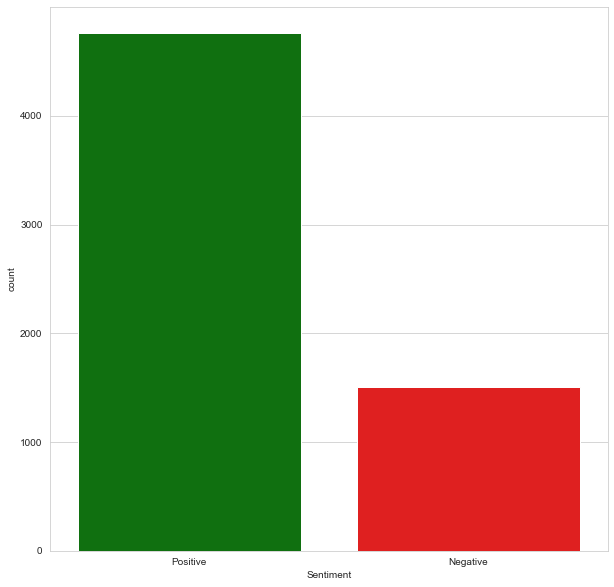

In [38]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=df, 
                  palette=dict(Neutral="blue", Positive="green", Negative="red"))

<AxesSubplot:ylabel='Sentiment'>

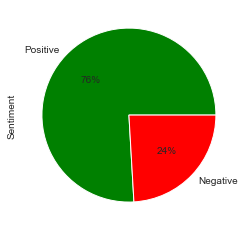

In [39]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])

In [40]:
df.Sentiment.value_counts()

Positive    4760
Negative    1510
Name: Sentiment, dtype: int64

In [24]:
#convert Polaty_type Negative, and Positive to 0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [25]:
le.fit(df['Sentiment'])

LabelEncoder()

In [26]:
list(le.classes_)

['Negative', 'Positive']

In [27]:
dfn = le.transform(df['Sentiment'])

In [28]:
df['Polarity'] = dfn
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    6270 non-null   object
 1   Polarity   6270 non-null   int32 
 2   Sentiment  6270 non-null   object
dtypes: int32(1), object(2)
memory usage: 122.6+ KB


Index(['comment', 'Polarity', 'Sentiment'], dtype='object')

In [29]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [30]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [31]:
df['clean_comment']=df['comment'].apply(lambda x: comment_to_words(x))
df['comment_length']=df['comment'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(df,test_size=0.25,random_state=42)

In [32]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Classifiers

In [35]:
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    GaussianNB()]

Accuracy of SVC is 0.7576530612244898
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.76      0.86      1568

    accuracy                           0.76      1568
   macro avg       0.50      0.38      0.43      1568
weighted avg       1.00      0.76      0.86      1568



C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x18be5bacc70>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x18be5bb1c40>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

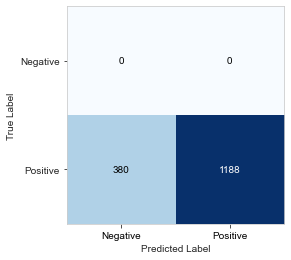

Accuracy of DecisionTreeClassifier is 0.8941326530612245
              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78       370
    Positive       0.93      0.93      0.93      1198

    accuracy                           0.89      1568
   macro avg       0.85      0.86      0.85      1568
weighted avg       0.90      0.89      0.89      1568



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x18be5bf7a30>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x18be5bfea30>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

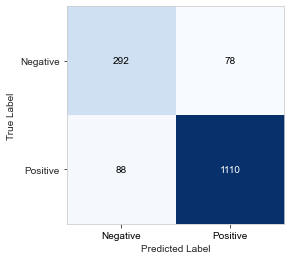

Accuracy of RandomForestClassifier is 0.8954081632653061
              precision    recall  f1-score   support

    Negative       0.64      0.90      0.75       270
    Positive       0.98      0.89      0.93      1298

    accuracy                           0.90      1568
   macro avg       0.81      0.90      0.84      1568
weighted avg       0.92      0.90      0.90      1568



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x18bf5b938b0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x18bf5b99850>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

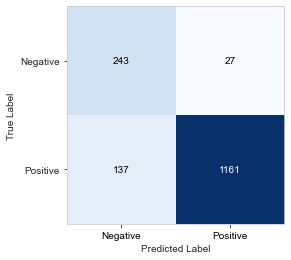

Accuracy of GradientBoostingClassifier is 0.8590561224489796
              precision    recall  f1-score   support

    Negative       0.46      0.93      0.61       187
    Positive       0.99      0.85      0.91      1381

    accuracy                           0.86      1568
   macro avg       0.72      0.89      0.76      1568
weighted avg       0.92      0.86      0.88      1568



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x18bf5be84c0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x18bf5be86a0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

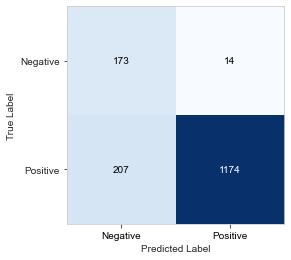

Accuracy of GaussianNB is 0.6575255102040817
              precision    recall  f1-score   support

    Negative       0.84      0.40      0.54       795
    Positive       0.60      0.92      0.73       773

    accuracy                           0.66      1568
   macro avg       0.72      0.66      0.63      1568
weighted avg       0.72      0.66      0.63      1568



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x18bf5c2bd90>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x18b80006e80>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

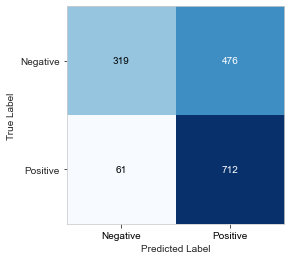

In [36]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Sentiment'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Sentiment']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Compare Classifiers

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x18bf5bcd280>,
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

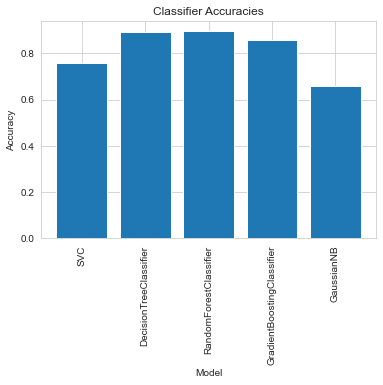

In [37]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy)
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')